In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.api as sm

import os
import json
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##DATA: direct load from the statsmodels library
http://statsmodels.sourceforge.net/devel/datasets/generated/macrodata.html

#I am interested in you understanding the concepts of stationarity:
##a time series is stationary if its MEAN and VARIANCE are constant globally 
##i.e. there can be local variations, but the mean over a reasonably large portion of the time series (several datapoints) will not change at large distances in the time series

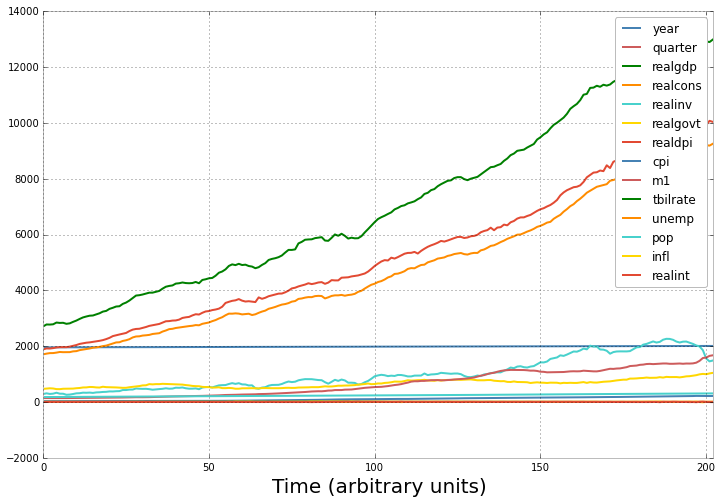

In [2]:
data = sm.datasets.macrodata.load_pandas().data


data.plot(figsize=(12,8));
pl.xlabel("Time (arbitrary units)", fontsize=20)
pl.legend(loc=1)
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(data, figsize=(25,25));

Real Gross Domestic Product (real GDP) is a macroeconomic measure of the value of economic output adjusted for price changes (i.e., inflation or deflation). This adjustment transforms the money-value measure, nominal GDP, into an index for quantity of total output.

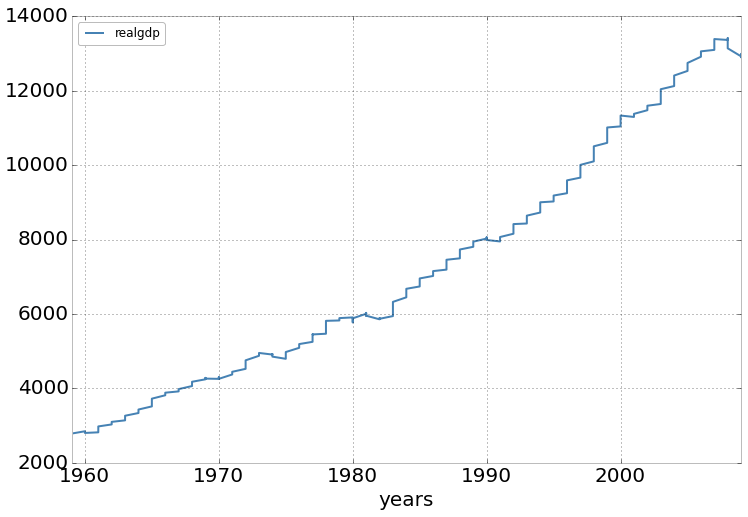

In [35]:
ax = data.plot('year','realgdp', figsize=(12,8), fontsize=20);
ax.set_xlabel("years", fontsize=20)

#use a ROLLING MEAN to visually assess stationarity

9     2806.4838
10    2827.2908
11    2847.1937
12    2872.7690
13    2900.7195
dtype: float64 198    13211.2024
199    13229.1482
200    13225.0976
201    13209.1801
202    13198.2241
dtype: float64


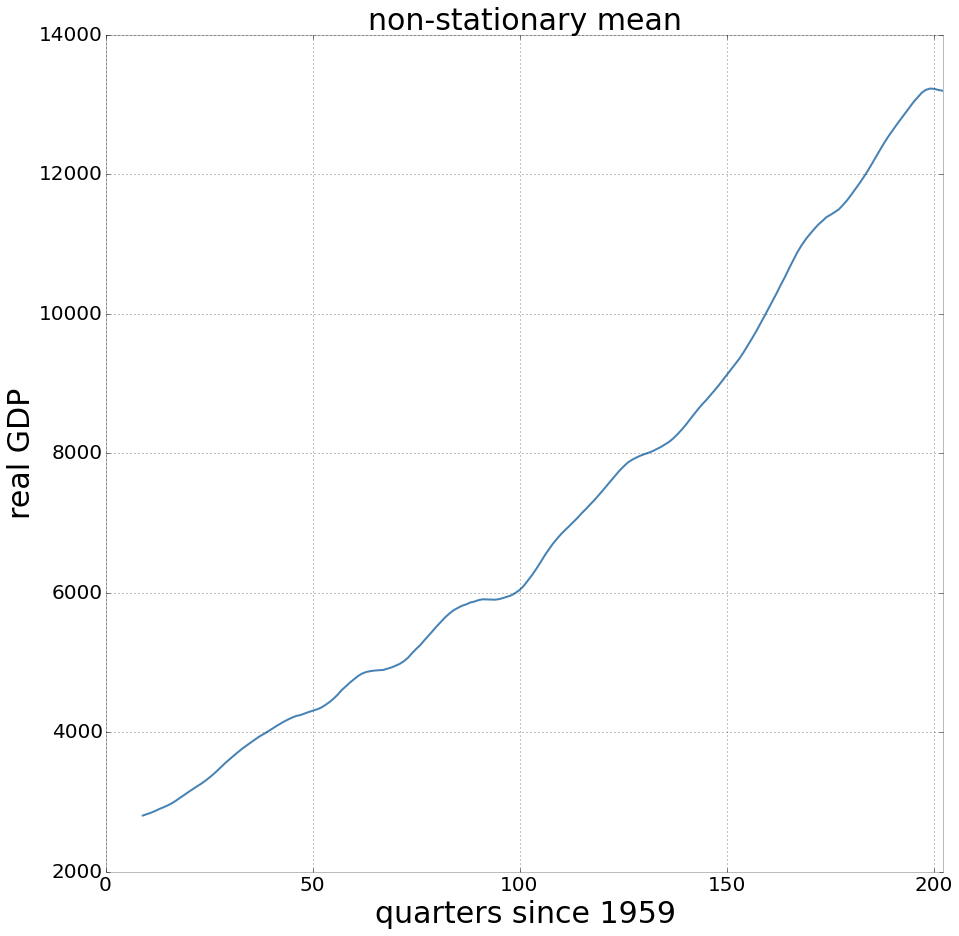

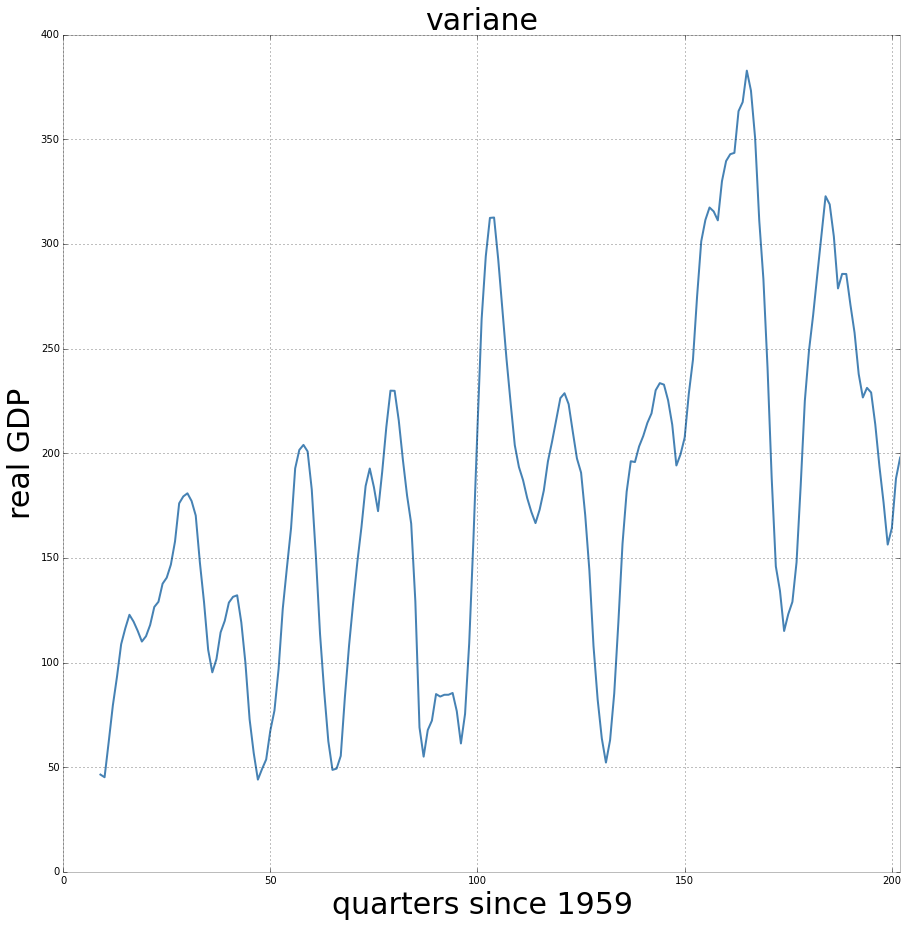

In [36]:
ax = pd.rolling_mean(data['realgdp'], 10).plot(figsize=(15,15), fontsize=20)
ax.set_title("non-stationary mean", fontsize=30)
pl.xlabel("quarters since 1959", fontsize=30)
pl.ylabel("real GDP", fontsize=30)
pl.figure()
ax = pd.rolling_std(data['realgdp'], 10).plot(figsize=(15,15))
ax.set_title("variane", fontsize=30)
pl.xlabel("quarters since 1959", fontsize=30)
pl.ylabel("real GDP", fontsize=30)

print (pd.rolling_mean(data['realgdp'], 10).dropna().head(), pd.rolling_mean(data['realgdp'], 10).dropna().tail())

differencing the time series to remove the long term behaviour

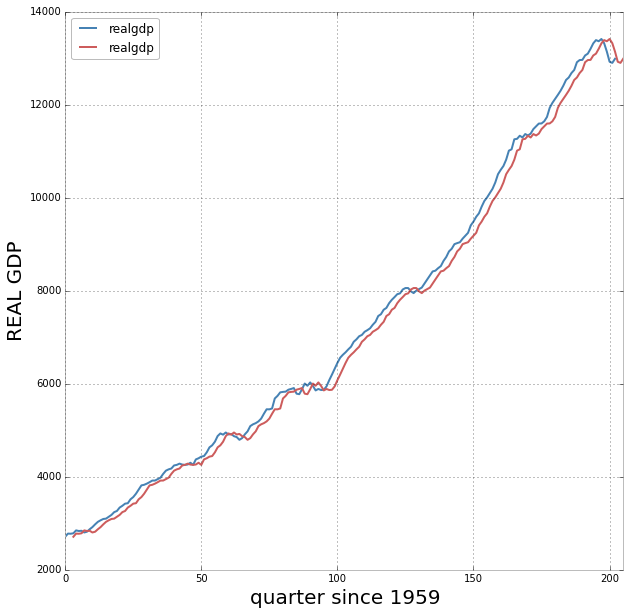

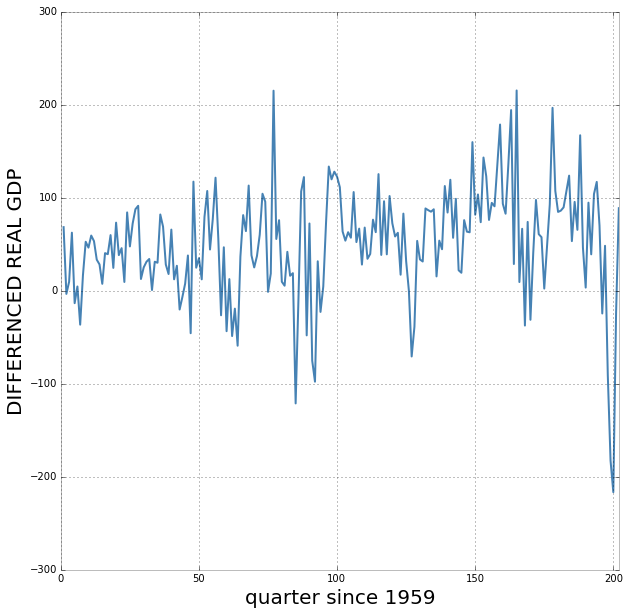

In [38]:

ax1 = data[['realgdp']].plot(figsize=(10,10))
ax1 = data[['realgdp']].plot(x=np.arange(len(data))+3, ax=ax1)
ax1.set_xlabel('quarter since 1959', fontsize=20)
ax1.set_ylabel('REAL GDP', fontsize=20)
 
pl.figure()
ax2 = data.realgdp.diff(periods=1).plot(figsize=(10,10))
ax2.set_xlabel('quarter since 1959', fontsize=20)
ax2.set_ylabel('DIFFERENCED REAL GDP', fontsize=20)


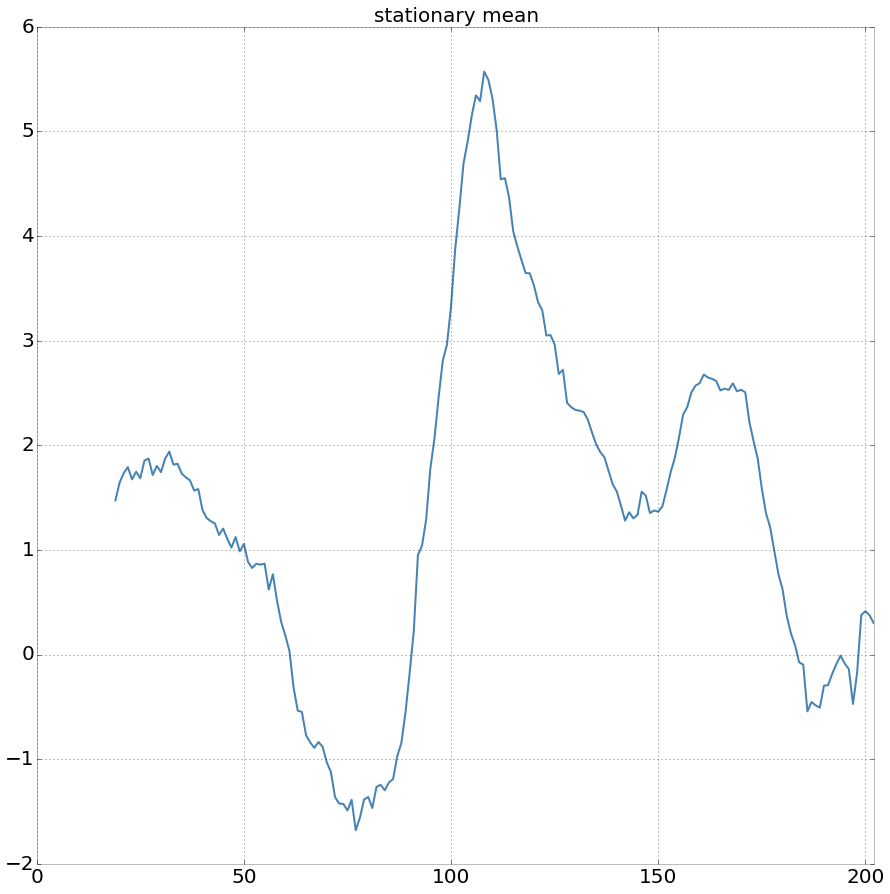

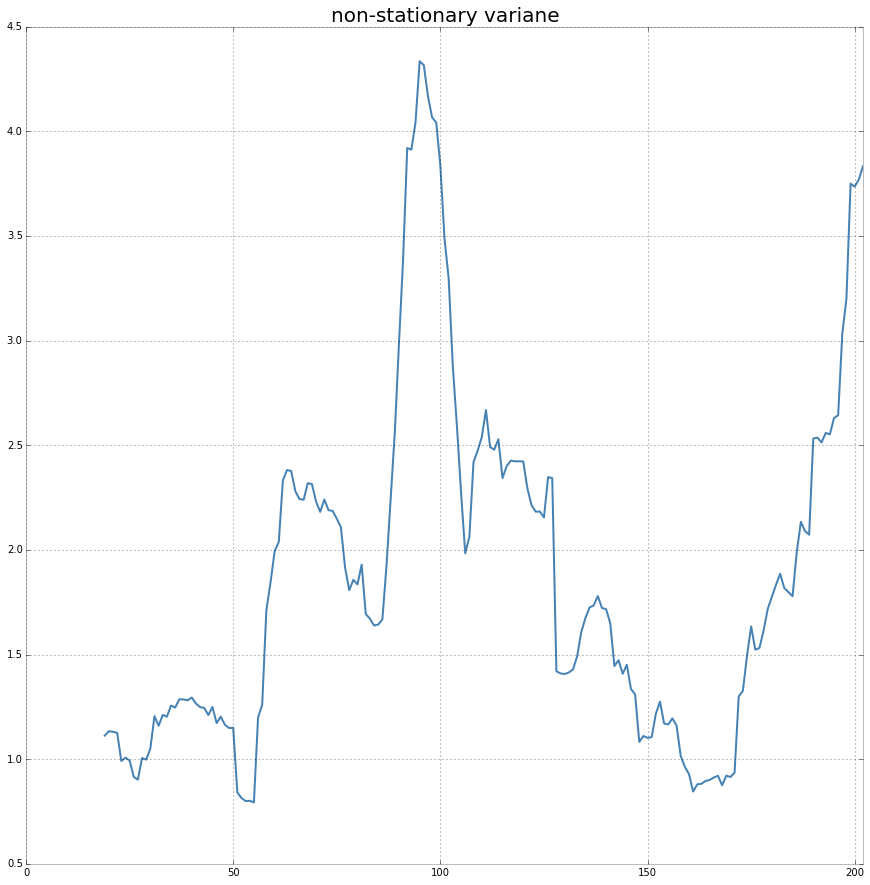

In [39]:
ax = pd.rolling_mean(data['realint'], 20).plot(figsize=(15,15), fontsize=20)
ax.set_title("stationary mean", fontsize=20)
pl.figure()
ax = pd.rolling_std(data['realint'], 20).plot(figsize=(15,15))
ax.set_title("non-stationary variane", fontsize=20)

synthetic data

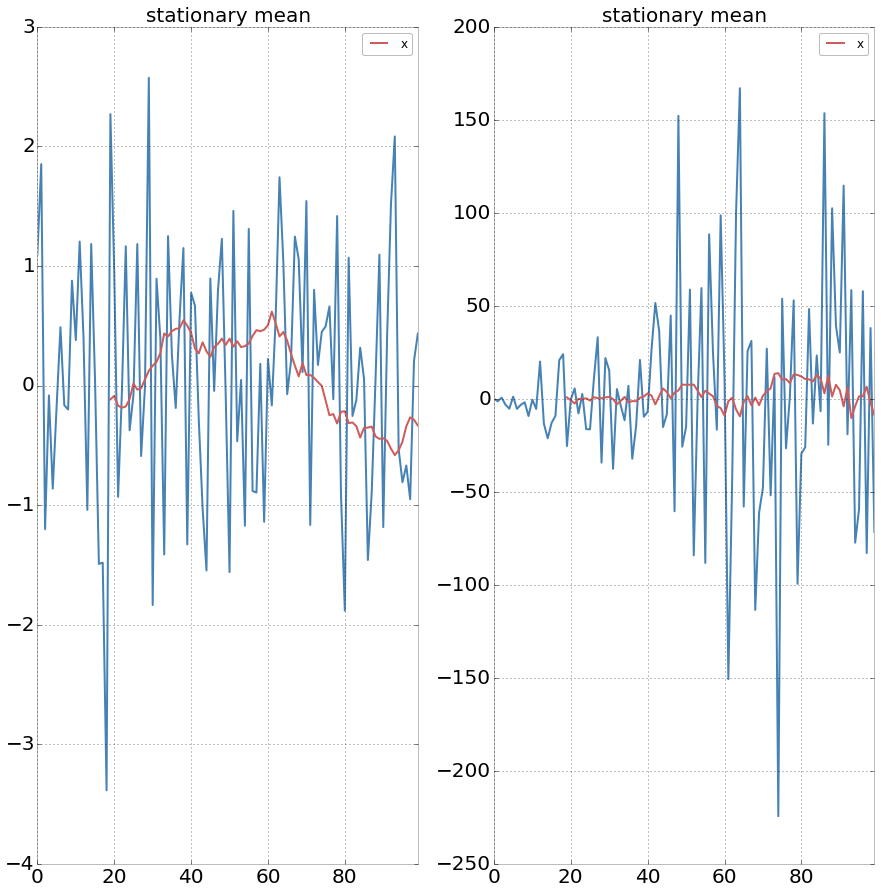

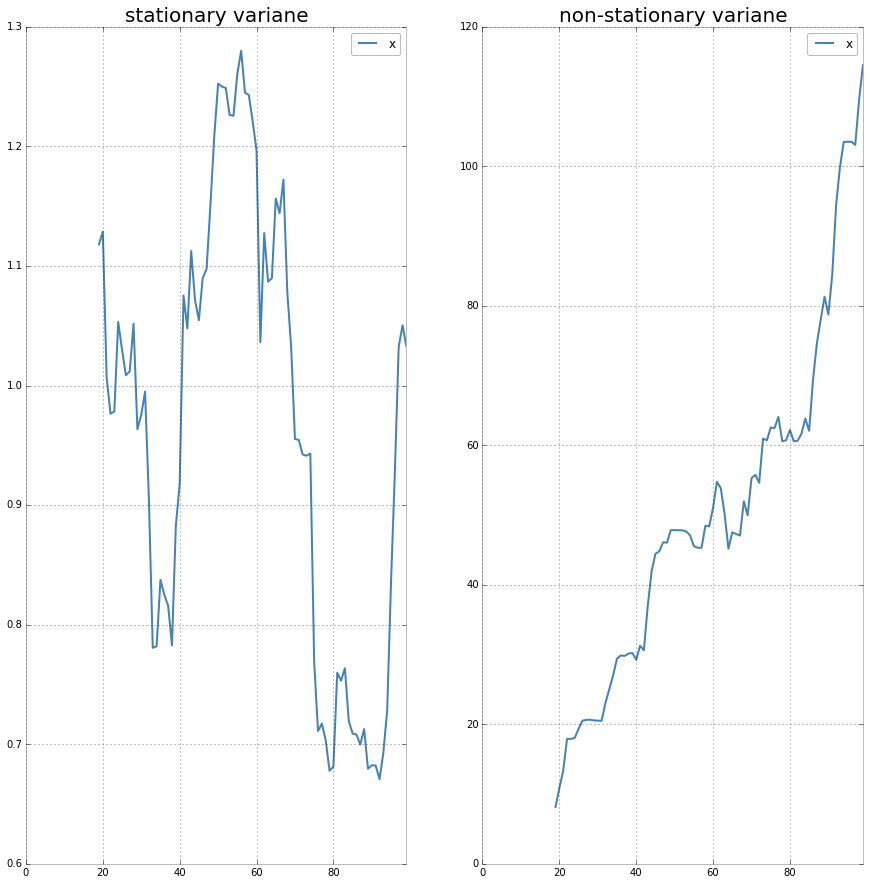

In [40]:
fig = pl.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
x1 = np.random.randn(100)
x2 = np.random.randn(100)*np.arange(0.,100,1.0)
ax1.plot(np.random.randn(100))
ax2.plot(np.random.randn(100)*np.arange(100))
ax1 = pd.rolling_mean(pd.DataFrame({'x':x1}), 20).plot(figsize=(15,15), fontsize=20, ax=ax1)
ax2 = pd.rolling_mean(pd.DataFrame({'x':x2}), 20).plot(figsize=(15,15), fontsize=20, ax=ax2)

ax1.set_title("stationary mean", fontsize=20)
ax2.set_title("stationary mean", fontsize=20)
fig = pl.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1 = pd.rolling_std(pd.DataFrame({'x':x1}), 20).plot(figsize=(15,15), ax=ax1)
ax2 = pd.rolling_std(pd.DataFrame({'x':x2}), 20).plot(figsize=(15,15), ax=ax2)
ax1.set_title("stationary variane", fontsize=20)
ax2.set_title("non-stationary variane", fontsize=20)

There are formal tests to see if these time series are stationary e.g.: ADFuller test
[https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test]
Null hypothsis: there is a "unit root": i.e. the series is not stationary [http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html]

In [41]:
print ("REALGDB and REALINT")
print ("realgdp {0:.2f}".format(sm.tsa.adfuller(data['realgdp'])[1]), 
       sm.tsa.adfuller(data['realgdp']))

print ("realint {0:.2f}".format(sm.tsa.adfuller(data['realint'])[1]), 
       sm.tsa.adfuller(data['realint']))



REALGDB and REALINT
realgdp 1.00 (1.7504627967647071, 0.99824553723350318, 12, 190, {'5%': -2.8768752281673717, '1%': -3.4652439354133255, '10%': -2.5749446537396121}, 2034.5171236683821)
realint 0.01 (-3.5337325911860349, 0.0071618724946517177, 2, 200, {'5%': -2.876102355, '1%': -3.4634760791249999, '10%': -2.574532225}, 827.24666293305995)


In [ ]:
print ("SYNTHETIC DATA")
print ("synthetic stationary data {0:.2f}".format(sm.tsa.adfuller(np.random.randn(100))[1]),
       sm.tsa.adfuller(np.random.randn(100)) )
print ("synthetic stationary data {0:.2f}".format(sm.tsa.adfuller(np.random.randn(100))[1]),
       sm.tsa.adfuller(np.random.randn(100)*np.arange(0.,100,1.0)) )

In [ ]:
print (sm.datasets.cancer.NOTE)

In [ ]:
cdata = sm.datasets.cancer.load_pandas().data

In [ ]:
cdata.describe()

In [ ]:
cdata.head()

In [ ]:
scatter_matrix(cdata)

In [ ]:
ax = pd.rolling_mean(cdata['cancer']/cdata['population'], 10).plot(figsize=(15,15), 
                                                                   fontsize=20)
ax.set_title("stationary mean", fontsize=20)
pl.figure()
ax = pd.rolling_std(cdata['cancer']/cdata['population'], 10).plot(figsize=(15,15))
ax.set_title("variance", fontsize=20)

In [ ]:
sm.tsa.adfuller (cdata['cancer']/cdata['population'])

In [ ]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]


fig = pl.figure(figsize = (10,20));
ax=[]
for i, data in enumerate(samples):
    ax.append(fig.add_subplot(6,2,i+1))
    
    
    ax[i].plot(data, 'k', alpha=0.3)
    ax[i].axis('off')
    ax[i].plot(np.where(data==max(data))[0], max(data),'o')
    ax[i].set_xlim(0,130)
    ax[i].plot(np.where(data==min(data))[0], min(data),'o')
    #ax.text(110, mean(data), "%.2f,%.2f"%(max(data),min(data)), 
    #        fontsize=15)
    #ax.text(0.8, 0.5, "%.2f,%.2f"%(max(data),min(data)), 
    #        fontsize=15, transform = ax.transAxes)
    ax[i].text(0.95, 0.5, "%.2f"%(min(data)), color = kelly_colors_hex[0],
            fontsize=15, transform = ax[i].transAxes)
    ax[i].text(0.8, 0.5, "%.2f"%(max(data)), color = kelly_colors_hex[1],
            fontsize=15, transform = ax[i].transAxes)
    if i<2:
        ax[i].plot((0,ax[i].get_xlim()[1]), (ax[i].get_ylim()[1], ax[i].get_ylim()[1]), 'k-',)

ax[0].text (0.2, 1.2, '{0:1s}             {1:2s} {2:2s}'.format('noisy cosine','min','min'), 
            transform = ax[0].transAxes, fontsize=15)
ax[1].text (0.2, 1.2, '{0:1s}             {1:2s} {2:2s}'.format('noisy cosine','min','min'), 
            transform = ax[1].transAxes, fontsize=15)
pl.xlabel("period (seconds)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum", fontsize=20)

import plotly.plotly as py
from plotly.matplotlylib import Exporter, PlotlyRenderer

renderer = PlotlyRenderer()    # make shorcuts 
exporter = Exporter(renderer)
# Grab info from matplotlib figure
exporter.run(fig)
# Create JSON dictionary for use with Plotly
renderer.plotly_fig
py.iplot(renderer.plotly_fig, filename='s6_nitty-gritty')

